<a href="https://colab.research.google.com/github/Denilza/Cientista-de-Dados/blob/main/Challenge_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge - Correlação e Regressão
Eduarda do Carmo Oliveira |
Elayne Ellen Teotonio Barbosa |
Tatiana Ferreira de Araujo |
Rosangela Patricia Lucia da Cruz |
Ully Mattilde Pozzobom Costa |
Ana Luisa Vieira | Natália Cristina Ciufa Kobayashi | Mariana Silva de Oliveira | Denilza Lima da Silva | Juliana Atala de Andrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm
import statsmodels.api as sm_api
import statsmodels.stats.anova as anova
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import io
import requests

In [ ]:

url_imoveis = "https://drive.google.com/file/d/1_bBWQ4SzM39DRD1lmKDZeCKyOdWbHeUO/view?usp=drive_link"

# Extraia o ID do arquivo do URL
file_id = url_imoveis.split("/")[-2]

# Construa o URL de download direto
download_url = f"https://drive.google.com/uc?id={file_id}"

# Baixe o conteúdo do arquivo CSV usando requests
response = requests.get(download_url)
response.raise_for_status()

# Ler o conteúdo como um arquivo CSV usando io.StringIO
df_imoveis = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

In [ ]:
# Visualizando DataFrame
df_imoveis.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


###1 - Analise a correlação de todas as variáveis com o preço do imóvel. Quais variáveis são mais correlacionadas? Quais são menos correlacionadas?

In [ ]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
correlacao = df_imoveis[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long']].corr()
correlacao.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.000816,0.343803
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.110538,-0.144765


Pelo mapa de calor observamos que as variáveis que apresentam relação mais forte com o preço são "sqft_living"(o tamanho do imóvel), a nota atribuída ao imóvel ("grade") e o tamanho da casa acima do solo ("sqft_above"). Já as variáveis menos relacionadas com o preço são o ano de construção, o tamanho do lote, a localização e a condição.

2 - Para as top 5 variáveis mais correlacionadas com o preço:

1.plote as suas distribuições (histograma e boxplot)

In [ ]:
# Matriz de correlação das variáveis do DataFrame df_imoveis
df_imoveis_corr = df_imoveis.select_dtypes(include=['int64','float64'])
df_imoveis_corr.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500


In [ ]:
# Encontrando as variáveis mais correlacionadas com o preço
for i in df_imoveis_corr.corr()['price'].sort_values(ascending=False)[1:6].index:
    print(i)

sqft_living
grade
sqft_above
bathrooms
view


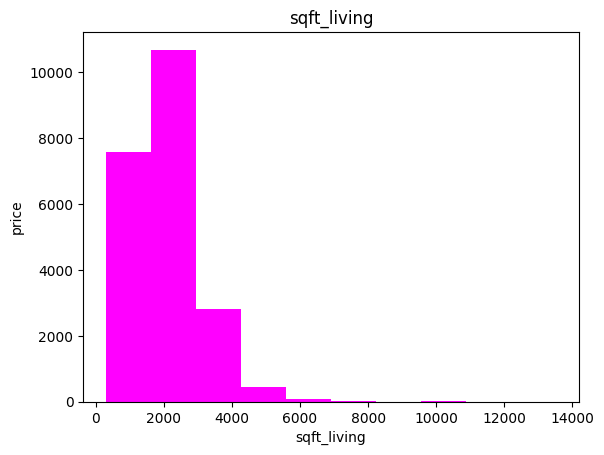

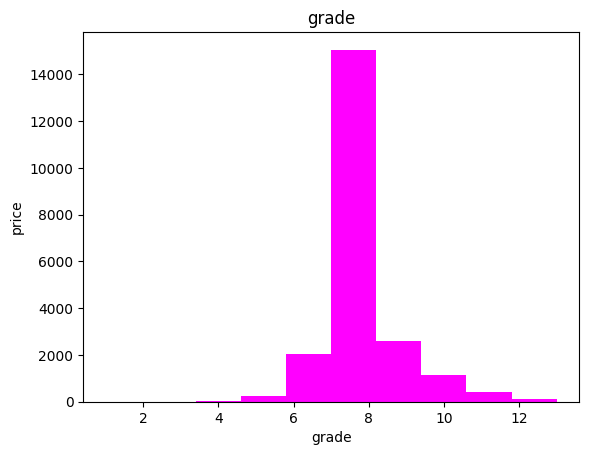

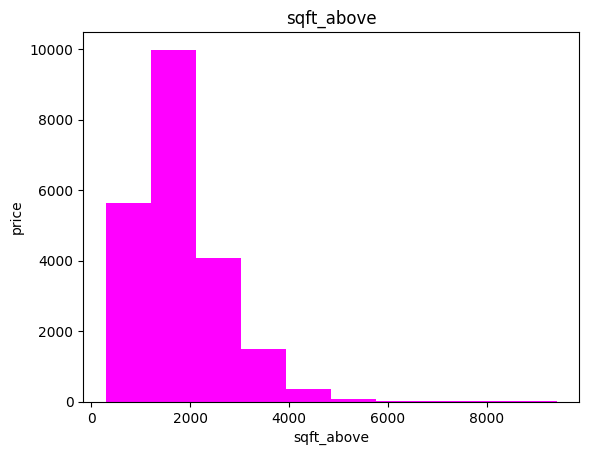

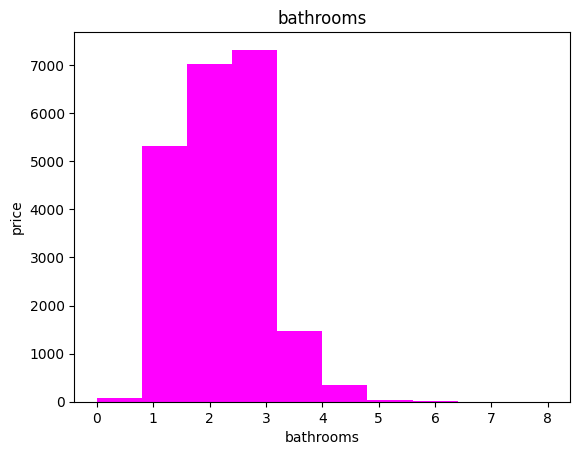

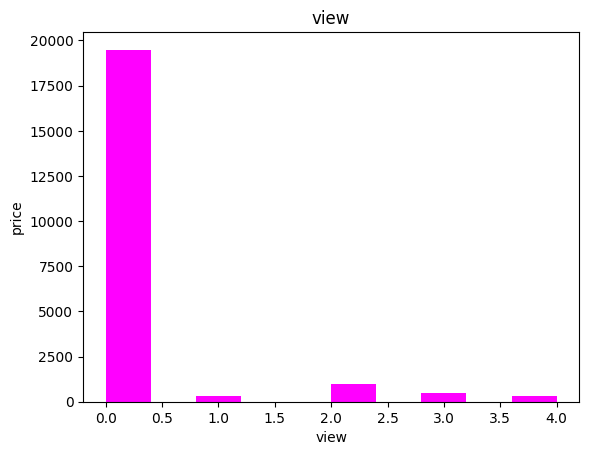

In [ ]:
for column in df_imoveis_corr.corr()['price'].sort_values(ascending=False)[1:6].index:
  plt.hist(df_imoveis[column],color='magenta')
  plt.xlabel(column)
  plt.ylabel('price')
  plt.title(column)
  plt.show()

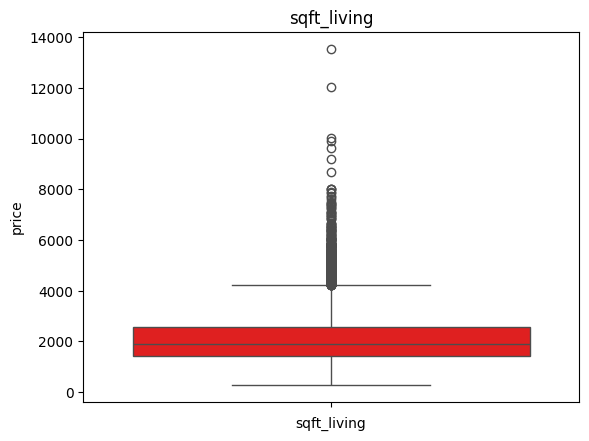

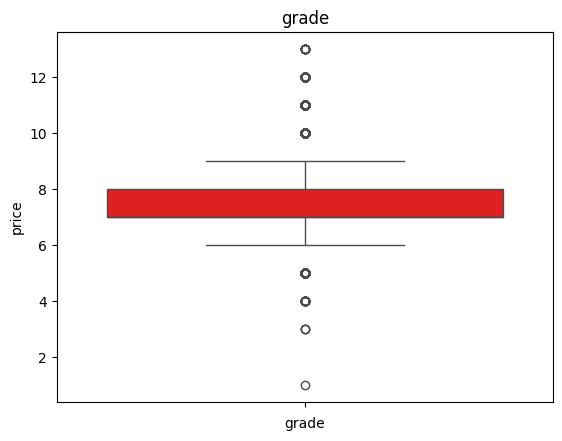

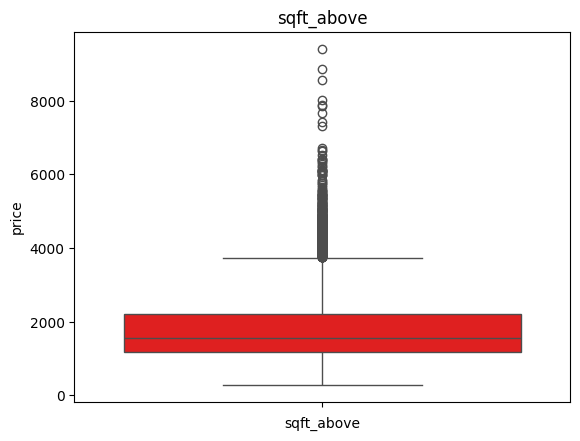

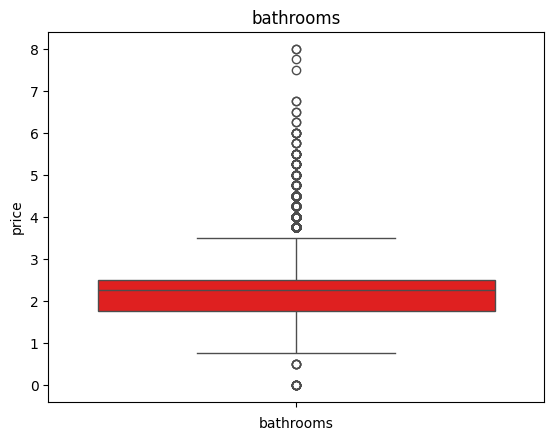

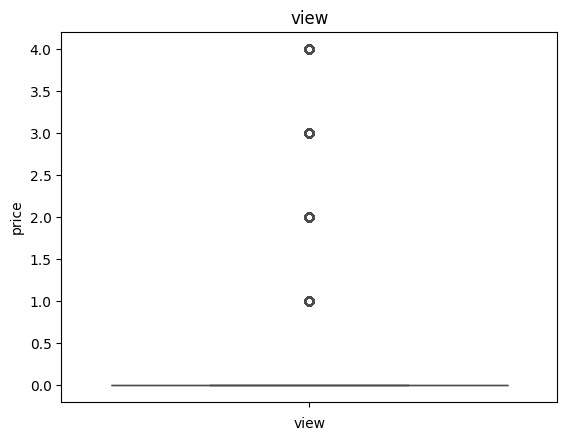

In [ ]:
for column in df_imoveis_corr.corr()['price'].sort_values(ascending=False)[1:6].index:
  sns.boxplot(df_imoveis[column],color='red')
  plt.xlabel(column)
  plt.ylabel('price')
  plt.title(column)
  plt.show()

2. plote o scatterplot (gráfico de dispersão), contendo preço no eixo Y e a
variável correlacionada no eixo X.

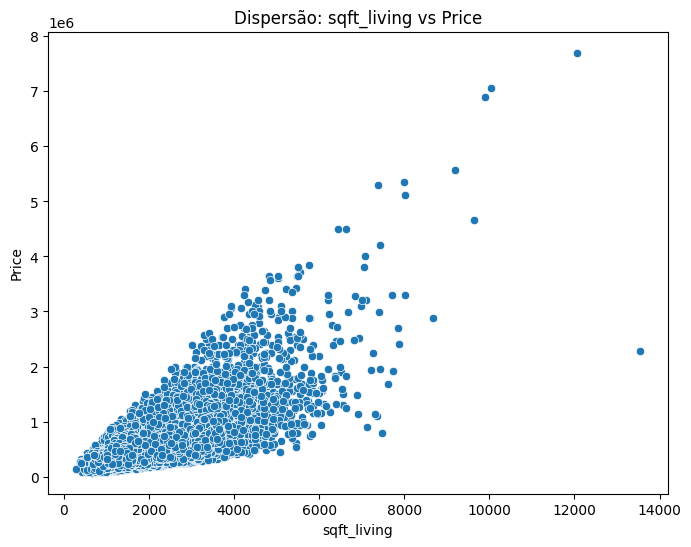

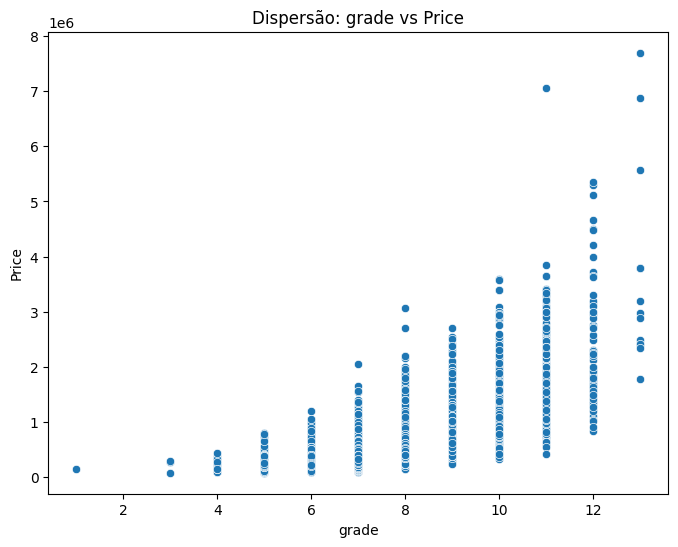

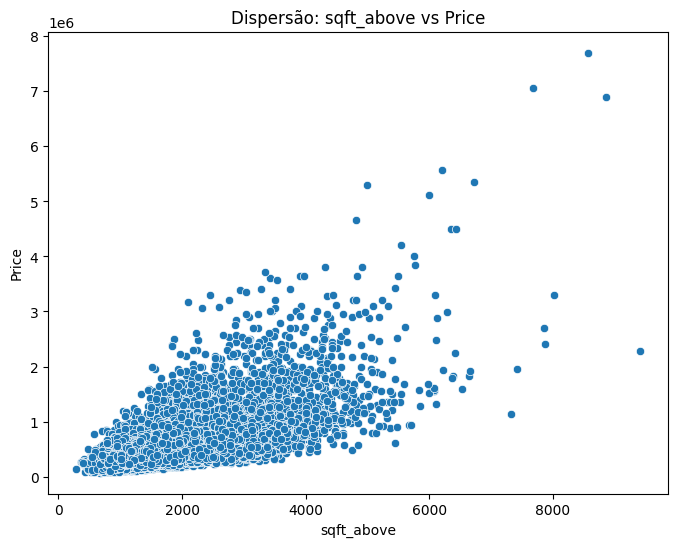

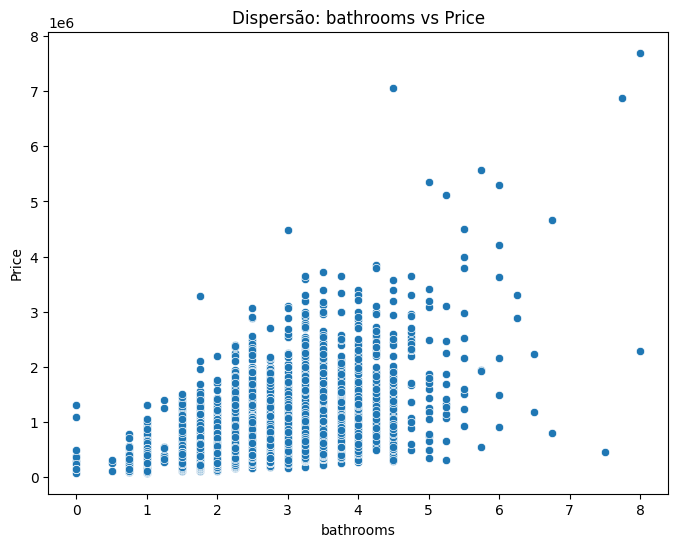

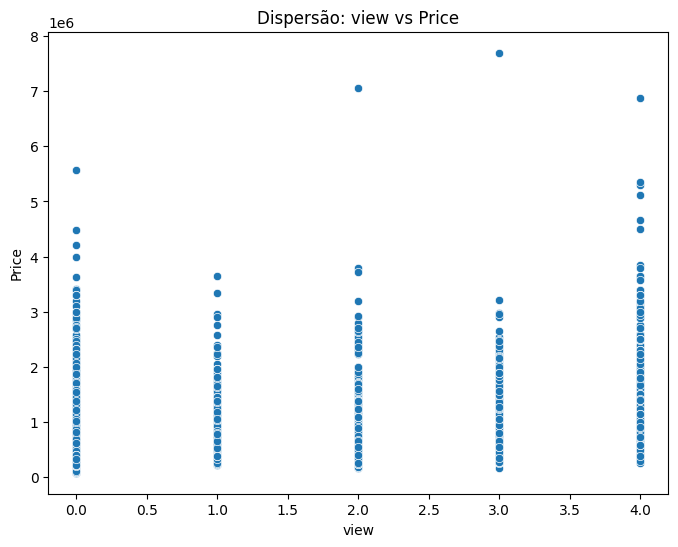

In [ ]:
# Plotar scatterplot (gráfico de dispersão) para cada variável em relação ao preço
for var in df_imoveis_corr.corr()['price'].sort_values(ascending=False)[1:6].index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_imoveis[var], y=df_imoveis['price'])
    plt.title(f'Dispersão: {var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

3. para cada uma das 5 variáveis faça uma regressão linear simples sendo
preciso a variável resposta (y) e interprete os resultados

In [ ]:
# filtrando as 5 colunas mais correlacionadas
mais_corr=df_imoveis[['sqft_living','grade','sqft_above', 'bathrooms','view']]
mais_corr.head()

,sqft_living,grade,sqft_above,bathrooms,view
0,1180,7,1180,1.00,0
1,2570,7,2170,2.25,0
2,770,6,770,1.00,0
3,1960,7,1050,3.00,0
4,1680,8,1680,2.00,0


In [ ]:

for var in mais_corr:
    X = df_imoveis[[var]]
    y = df_imoveis['price']


    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(f'Resultados da Regressão Linear para {var}:\n', model.summary())

Resultados da Regressão Linear para sqft_living:
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:47:05   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
